<font color="maroon" size="6"><center><b>Multiple Linear Regression(House Price Prediction)</b></center></font>
<font color="Royalblue" size="4"><center>Owner: Sushant Borade</center></font>
<font color="Royalblue" size="4"><center>Mail ID: sushant.9196@gmail.com</center></font>

<font size="4" color="green"><b>Loading All Package</b></font>

In [51]:
import pandas as pd
import os as os
import numpy as np

#Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# To split data
from sklearn.model_selection import train_test_split

# Models
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Evalution 
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

<font size="4" color="green"><b>User Defined Function</b></font>

In [52]:
def scatter_regplot(x, y, in_data): 
    '''
    Returns Scatter plot with regression trend line
    '''
    
    sns.regplot(x=x, y=y, data=in_data) 
    plt.xlabel(x, fontsize = 13)
    plt.ylabel(y, fontsize = 13)
    plt.title("Scatter Plot of " + x + " & " + y, fontsize = 15)
    plt.grid()
    plt.show()

In [53]:
def all_error_metric(actual, predicted):
    '''
    returns important error metrics (You can add more like MAE, MAPE ..)
    '''
    
    mse = mean_squared_error(actual,predicted)    # to be only of test data (how much is the score in surprise test?)
    rmse = np.sqrt(mse).round(2)
    rsq = r2_score(actual,predicted).round(2)
    print ("RMSE: ", rmse)
    print ("R sq: ", rsq)

<font size="4" color="green"><b>Loading the DataSet</b></font>

In [54]:
#Load the dataSet
filepath = r"F:\github"
filename = "Boston.csv"

data = pd.read_csv(os.path.join(filepath, filename))

In [55]:
data.head() #Top 5 rows

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [56]:
data.tail() #Bottom 5 rows

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


<font color = "Red" size="4"><b>Data Cleaning</b></font>

In [57]:
data.shape #Find no or rows and columns

(506, 15)

In [58]:
data.columns #To get column Names

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [59]:
data['Unnamed: 0'].nunique(),data.shape[0]

(506, 506)

<font size="3">We Can see that unique value in "Unnamed:0" column is same as that of no of rows, thus "Unnamed:0" column can just be consider as a row identifier So we can drop that column</font>

<Font color="Red" size="4"><b>Remove Unwanted Columns</b></Font>

In [60]:
data = data.drop(["Unnamed: 0"], axis = 1)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<font size="4" color="red"><b>Check For missing values</b></font>

In [61]:
data.isnull().sum()  # Missing values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

<font size="4" color="green"><b>Lucky !! No missing data :)</b></font>

<font size="4" color="blue"><b>Lets take Prices first - as that is our output variable</b></font>

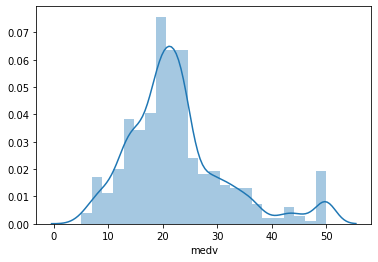

In [62]:
#Histogram
sns.distplot(data["medv"])

<font color="green" size="4"><b>Normal !! with some outliers :)</b></font>

<font size="4" color="red"><b>Univariant Analysis</b></font>

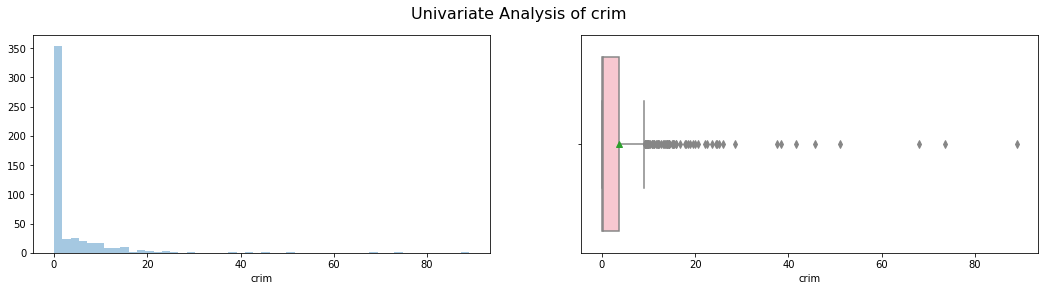

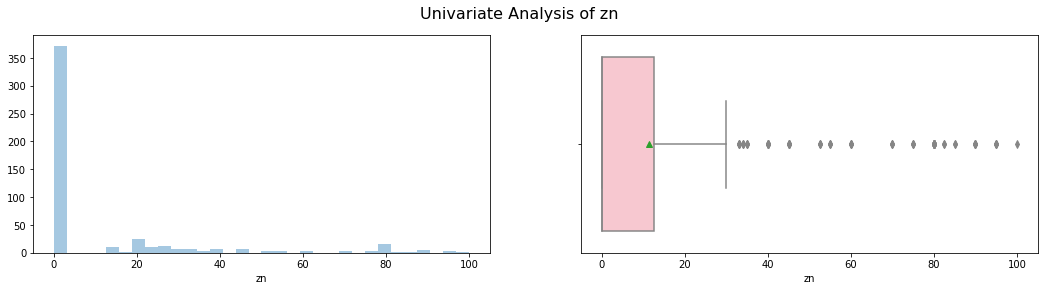

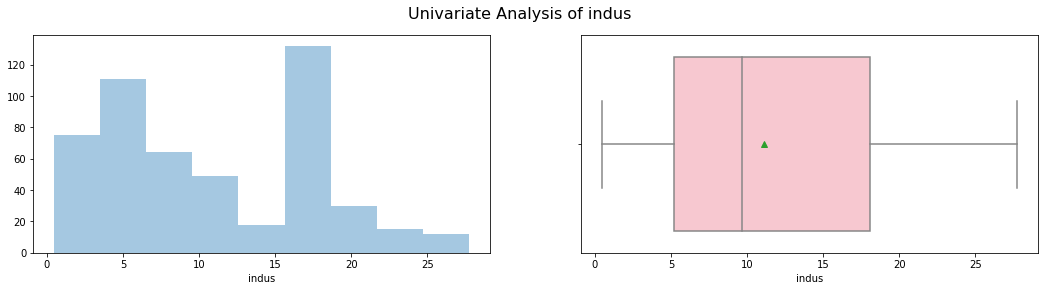

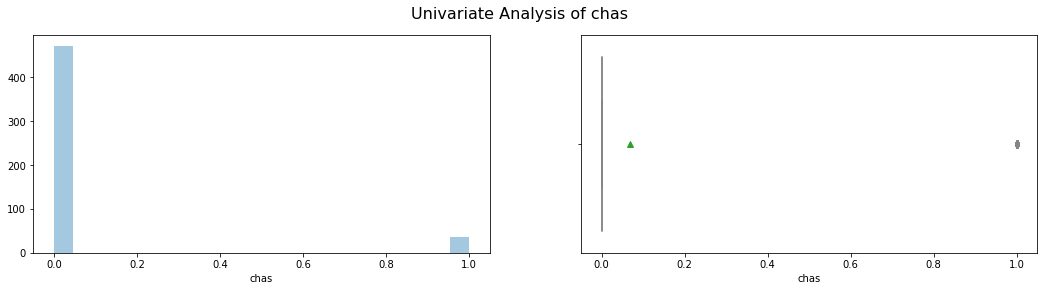

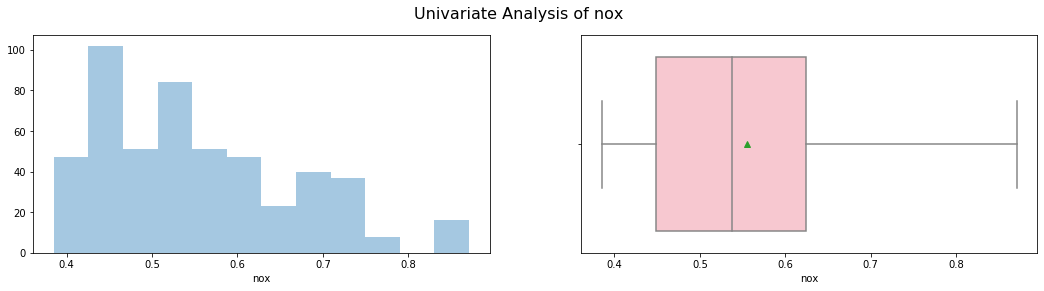

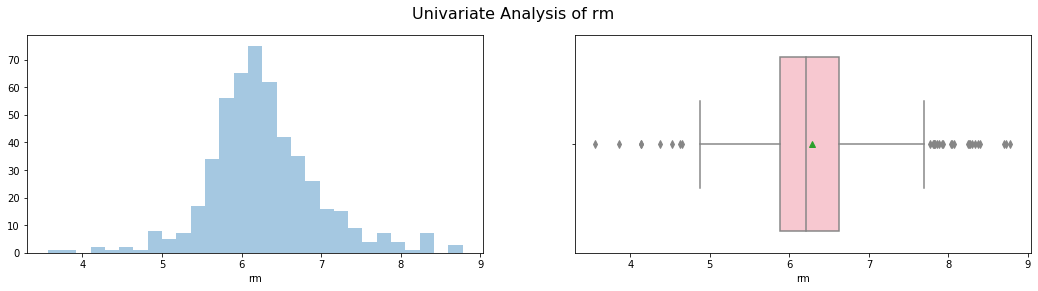

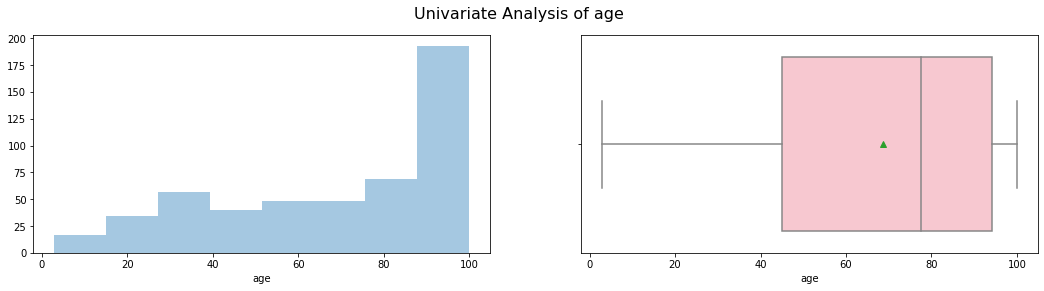

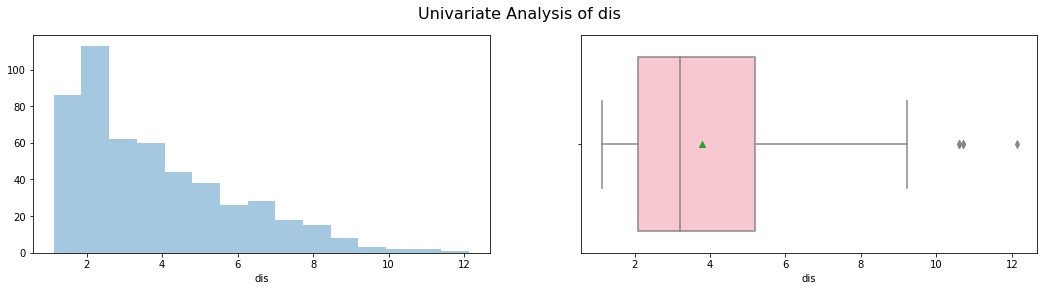

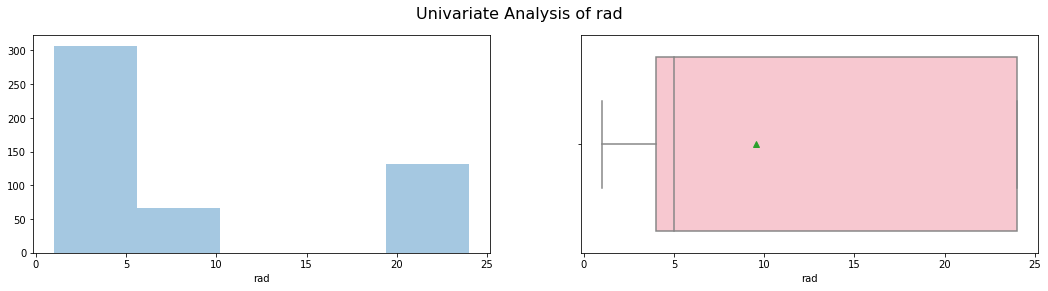

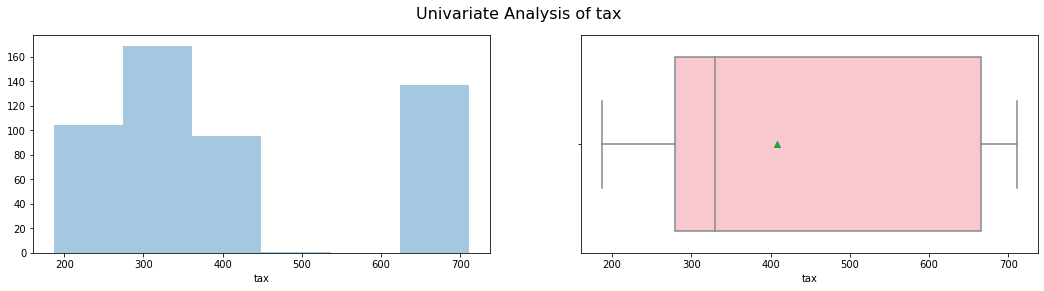

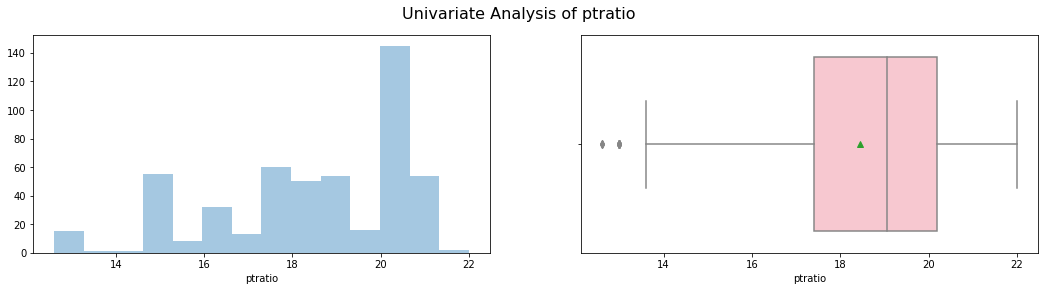

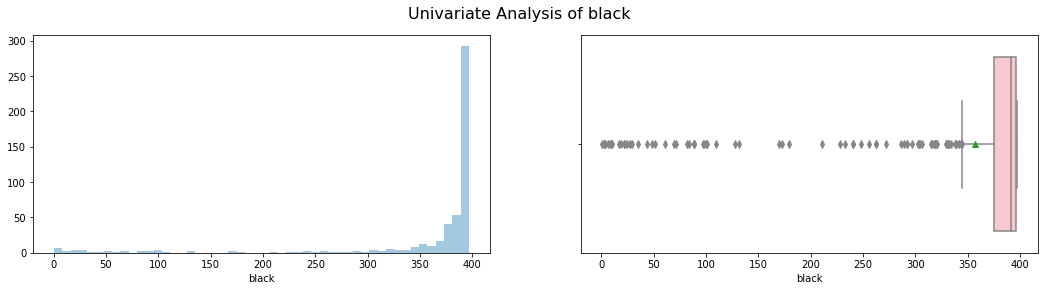

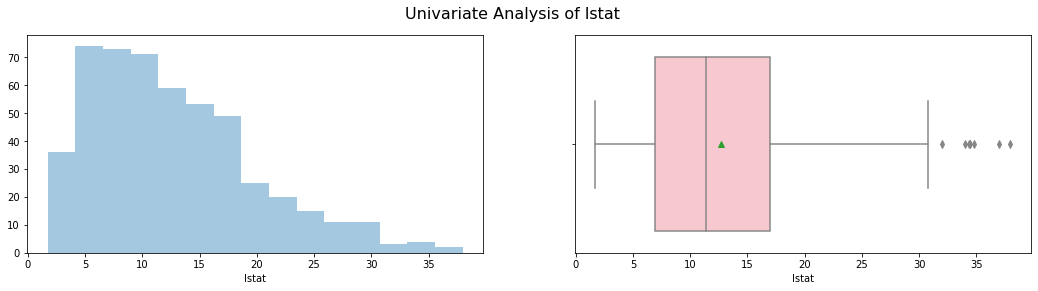

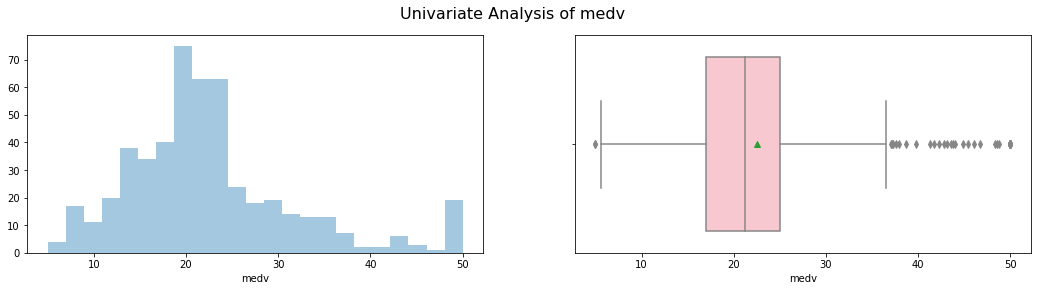

In [63]:
x_axis = data.columns.tolist() # List
for x in x_axis:
    fig, axes = plt.subplots(1, 2, figsize=(18,4))
    sns.distplot(data[x], ax=axes[0], kde = False)
    sns.boxplot(data[x], ax=axes[1], orient = "h", showmeans = True, color = "pink")
    fig.suptitle('Univariate Analysis of ' + x, fontsize=16)

<font size="4" color="red"><b>Bi-Variate Analysis</b></font>

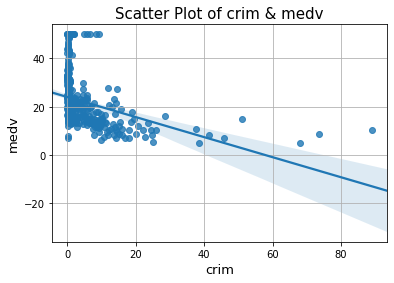

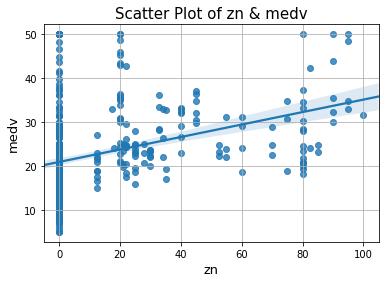

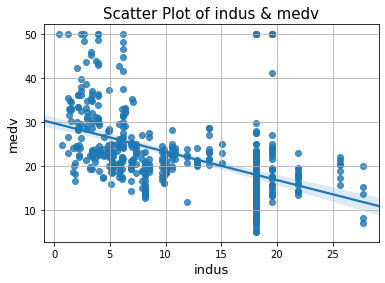

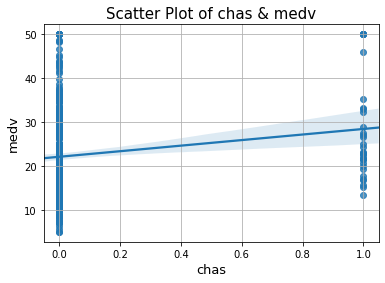

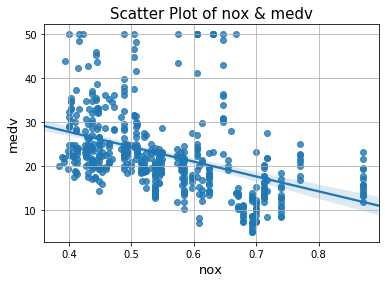

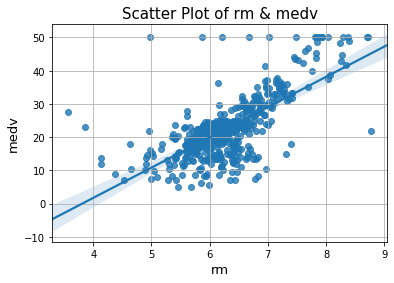

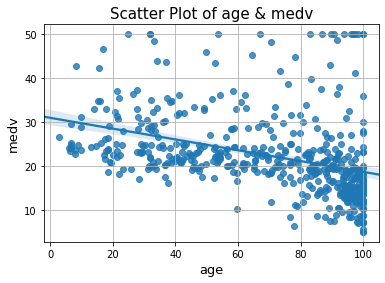

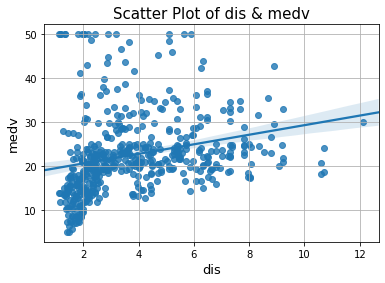

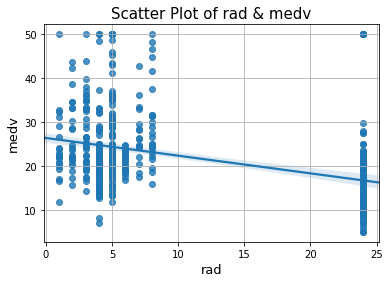

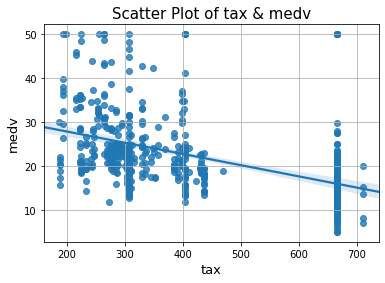

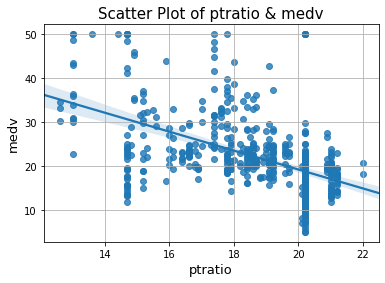

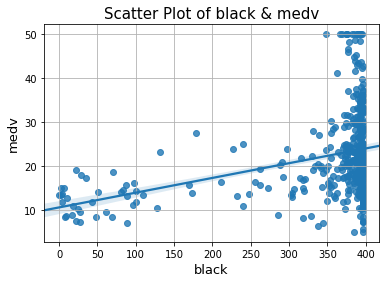

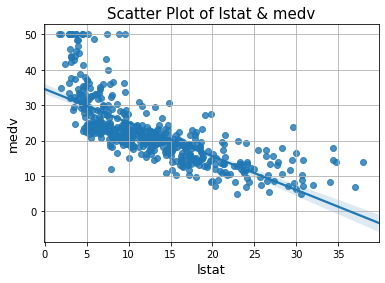

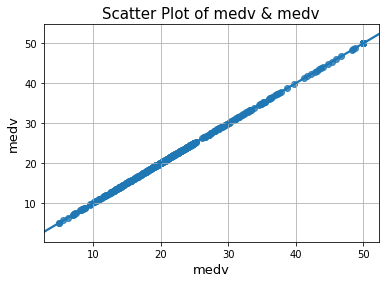

In [64]:
x_axis = data.columns.tolist()
y_axis = "medv"

for col in x_axis:
    scatter_regplot(x = col, y = y_axis, in_data = data)

<font size="4" color="green"><b>Linearity !! Looks like LSTAT, RM, PTRATIO have some linearity with Price</b></font>

<font color="blue" size="4"><b>Correlation Using Heatmap</b></font>

In [65]:
def HeatMap(df):
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(18, 9))        # Sample figsize in inches
    sns.heatmap(corr,annot=True ,linewidths=.10,ax=ax,cmap='YlGnBu',mask=mask, vmin = -1,vmax=1,)
    bottom, top = ax.get_ylim()
    #print("Bottom is ",bottom,"After adding",bottom+0.5)
    #print("TOp is ",top,"After adding",top-0.5)
    ax.set_ylim(bottom + 0.5, top - 0.5)

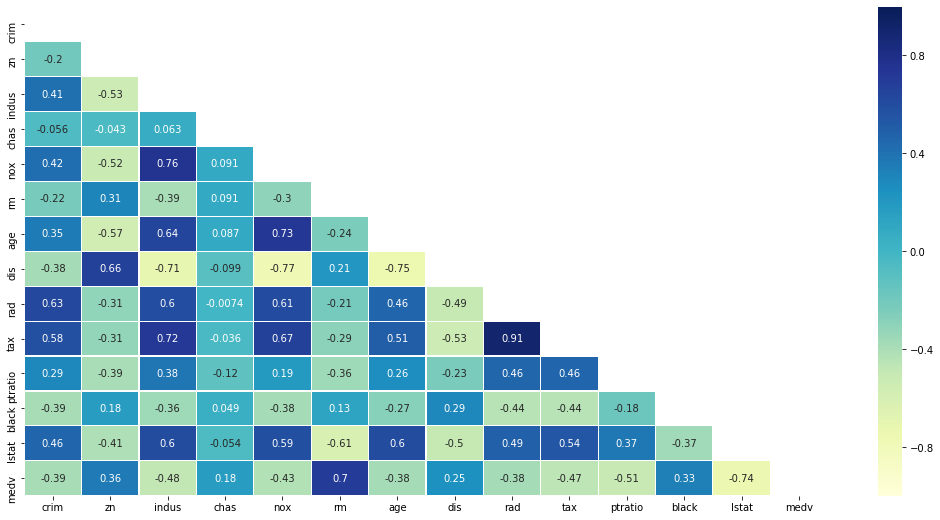

In [66]:
HeatMap(data)

<font size="4" color="green"><b>Linearity seems True !! Looks like LSTAT and RM have some linearity with Price</b></font>

<font size="6" color="maroon"><b><center><u>Model 1: OLS with All features</u></center></b></font>

In [67]:
data.drop("medv", axis = 1).columns     # All features for model 1

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [68]:
X = data[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y = data[["medv"]]             # Output data

In [69]:
# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 21)   # 70-30 Split

In [70]:
X_train_1 = sm.add_constant(X_train)    # Adds Intercept 

lm = sm.OLS(y_train, X_train_1)       # Creates function
lm = lm.fit()                      # Get best fit line output

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     87.96
Date:                Fri, 02 Oct 2020   Prob (F-statistic):          3.39e-107
Time:                        23:45:42   Log-Likelihood:                -1186.7
No. Observations:                 404   AIC:                             2401.
Df Residuals:                     390   BIC:                             2458.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.6532      5.605      7.253      0.000      29.633      51.673
crim          -0.0877      0.043     -2.057      0.040      -0.172      -0.004
zn             0.0488      0.016      3.114      0.002       0.018       0.080
indus          0.0195      0.065      0.299      0.765      -0.109       0.148
chas           3.0631      0.888      3.451      0.001       1.318       4.808
nox          -18.4821      4.141     -4.463      0.000     -26.624     -10.341
rm             3.3470      0.449      7.453      0.000       2.464       4.230
age            0.0032      0.015      0.221      0.825      -0.025       0.032
dis           -1.4257      0.218     -6.538      0.000      -1.854      -0.997
rad            0.3252      0.072      4.541      0.000       0.184       0.466
tax           -0.0120      0.004     -3.030      0.003      -0.020      -0.004
ptratio       -1.0558      0.147     -7.173      0.000      -1.345      -0.766
black          0.0108      0.003      3.610      0.000       0.005       0.017
lstat         -0.5384      0.055     -9.794      0.000      -0.646      -0.430
==============================================================================
Omnibus:                      118.140   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.885
Skew:                           1.270   Prob(JB):                     3.68e-95
Kurtosis:                       7.403   Cond. No.                     1.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font color="green" size="4"><b>P-Value Analysis</b></font>

In [71]:
pvalue = 0.735
if (pvalue <= 0.05):
    print ("Reject Ho: Relation")
else:
    print ("Accept Ho:No Relation")

Accept Ho:No Relation


<font size="4" color="orange"><b>Well we used all features without checking for any linearity. Looking at confidence interval & p-values "Indus" & "Age" doesnt make any sense for our model 1</b></font>

<font size="6" color="maroon"><b><center><u>Model 2: OLS dropping waste columns (indus, age)</u></center></b></font>

In [73]:
X = data.drop(["medv", "indus", "age"], axis = 1)  # Drop unwanted columns in X
y = data[["medv"]]             # Output data

In [74]:
# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 21)   # 70-30 Split

X_train_1 = sm.add_constant(X_train)    # Adds Intercept 

lm = sm.OLS(y_train, X_train_1)       # Creates function
lm = lm.fit()                      # Get best fit line output

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     104.4
Date:                Fri, 02 Oct 2020   Prob (F-statistic):          3.47e-109
Time:                        23:48:21   Log-Likelihood:                -1186.8
No. Observations:                 404   AIC:                             2398.
Df Residuals:                     392   BIC:                             2446.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.4210      5.555      7.277      0.000      29.501      51.341
crim          -0.0885      0.042     -2.085      0.038      -0.172      -0.005
zn             0.0481      0.015      3.110      0.002       0.018       0.078
chas           3.0967      0.881      3.516      0.000       1.365       4.828
nox          -17.8952      3.817     -4.688      0.000     -25.400     -10.390
rm             3.3599      0.435      7.724      0.000       2.505       4.215
dis           -1.4558      0.201     -7.226      0.000      -1.852      -1.060
rad            0.3184      0.069      4.625      0.000       0.183       0.454
tax           -0.0115      0.004     -3.185      0.002      -0.019      -0.004
ptratio       -1.0470      0.145     -7.228      0.000      -1.332      -0.762
black          0.0108      0.003      3.640      0.000       0.005       0.017
lstat         -0.5327      0.051    -10.380      0.000      -0.634      -0.432
==============================================================================
Omnibus:                      119.570   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              446.450
Skew:                           1.281   Prob(JB):                     1.13e-97
Kurtosis:                       7.467   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font size="4" color="orange"><b>Hmmm.... looks okay.. but do we need all (11) features? can we get nearly same accuracy using few relevant features? Lets use Linearity assumption now !</b></font>

<font size="6" color="maroon"><b><center><u>Model 3: OLS with LSTAT only</u></center></b></font>

In [75]:
X = data[["lstat"]]   # Input data 
y = data[["medv"]]             # Output data

# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 21)   # 70-30 Split

X_train_1 = sm.add_constant(X_train)    # Adds Intercept 
X_test_1 = sm.add_constant(X_test)    # Adds Intercept 

lm = sm.OLS(y_train, X_train_1)       # Creates function
lm = lm.fit()                      # Get best fit line output

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     489.6
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           1.55e-71
Time:                        23:48:25   Log-Likelihood:                -1302.4
No. Observations:                 404   AIC:                             2609.
Df Residuals:                     402   BIC:                             2617.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5680      0.621     55.706      0.000      33.348      35.788
lstat         -0.9407      0.043    -22.128      0.000      -1.024      -0.857
==============================================================================
Omnibus:                      106.597   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.858
Skew:                           1.409   Prob(JB):                     8.12e-48
Kurtosis:                       5.224   Cond. No.                         30.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font size="4" color="orange"><b>LSTAT alone can give us approx 55% accuracy</b></font>

<font size="4" color="green"><b>Visualize Best Fit Line</b></font>

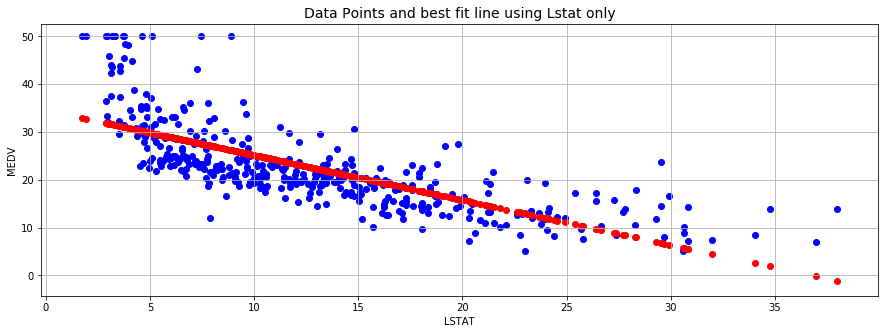

In [25]:
plt.figure(figsize = (15,5))
# beacuse it have only  Train data - Regression line (eq can also be used)
plt.scatter(X_train["lstat"], y_train,  color='blue')
plt.scatter(X_train["lstat"], lm.predict(X_train_1),  color='red')
#plt.scatter(X_test["lstat"], lm.predict(X_test_1),  color='black')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.title("Data Points and best fit line using Lstat only", fontsize = 14)
plt.grid()
plt.show()

<font size="4" color="orange"><b>Lets take second linear feature (RM). LSTAT & RM collinearity looks okay (0.6 - Not very high)</b></font>

<font size="6" color="maroon"><b><center><u>Model 4: OLS with LSTAT & RM only</u></center></b></font>

In [26]:
X = data[["lstat", "rm"]]   # Input data  
y = data[["medv"]]             # Output data

# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 21)   # 70-30 Split

X_train_1 = sm.add_constant(X_train)    # Adds Intercept 

lm = sm.OLS(y_train, X_train_1)       # Creates function
lm = lm.fit()                      # Get best fit line output

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     346.2
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           4.55e-88
Time:                        22:56:52   Log-Likelihood:                -1260.7
No. Observations:                 404   AIC:                             2527.
Df Residuals:                     401   BIC:                             2539.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5738      3.486      0.451      0.652      -5.280       8.428
lstat         -0.6515      0.049    -13.346      0.000      -0.748      -0.556
rm             4.6682      0.487      9.589      0.000       3.711       5.625
==============================================================================
Omnibus:                      107.354   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.752
Skew:                           1.255   Prob(JB):                     2.21e-65
Kurtosis:                       6.374   Cond. No.                         200.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font size="4" color="orange"><b>Wooo !!! Thats approx 63% accuracy.. We can even use polynominal features to build best fit line 
</b></font>

<font size="4" color="green"><b>Visualize Best Fit Line</b></font>

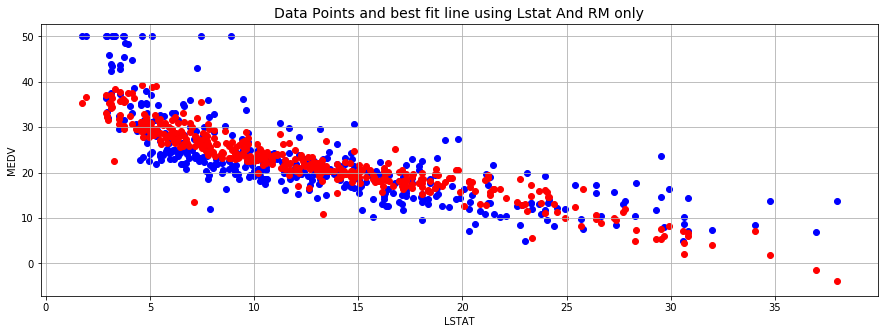

In [27]:
plt.figure(figsize = (15,5))
# beacuse it have only  Train data - Regression line (eq can also be used)
plt.scatter(X_train["lstat"], y_train,  color='blue')
plt.scatter(X_train["lstat"], lm.predict(X_train_1),  color='red')
#plt.scatter(X_test["lstat"], lm.predict(X_test_1),  color='black')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.title("Data Points and best fit line using Lstat And RM only", fontsize = 14)
plt.grid()
plt.show()

<font size="6" color="maroon"><b><center><u>Model 5: OLS with LSTAT & LSTAT polynominal features</u></center></b></font>

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
X = data[["lstat"]]   # Input data 
y = data[["medv"]]             # Output data

# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 21)   # 70-30 Split

# transforms the existing features to higher degree features.
polynomial_features = PolynomialFeatures(degree = 2)
X_train_poly = polynomial_features.fit_transform(X_train)


In [30]:
# fit the transformed features to Linear Regression
poly_model = sm.OLS(y_train, X_train_poly)       # Creates function
poly_model = poly_model.fit()                      # Get best fit line output

poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     364.4
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           6.33e-91
Time:                        22:57:05   Log-Likelihood:                -1254.1
No. Observations:                 404   AIC:                             2514.
Df Residuals:                     401   BIC:                             2526.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.7576      0.961     44.512      0.000      40.869      44.646
x1            -2.2990      0.136    -16.926      0.000      -2.566      -2.032
x2             0.0428      0.004     10.411      0.000       0.035       0.051
==============================================================================
Omnibus:                       75.737   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.375
Skew:                           1.042   Prob(JB):                     2.00e-31
Kurtosis:                       5.013   Cond. No.                     1.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font size="4" color="orange"><b>Wooo !!! Thats approx 64% accuracy with LSTAT and its 2 degree feature (x square), but it should not overfit.. To test the overfit we need new data to check performance (Here comes our test data - surprise test for our model - Accuracy in train & Test should be near)</b></font>

In [31]:
X_test_poly = polynomial_features.fit_transform(X_test)    # Adding degrees data

# Calculate R square vale
rsq = r2_score(y_test["medv"], poly_model.predict(X_test_poly))    # On test data (In summary output its on train data)
print ("R Square:", round(rsq, 3))

R Square: 0.624


<font size="4" color="green"><b>Visualizing Polynomial Best Fit Line</b></font>

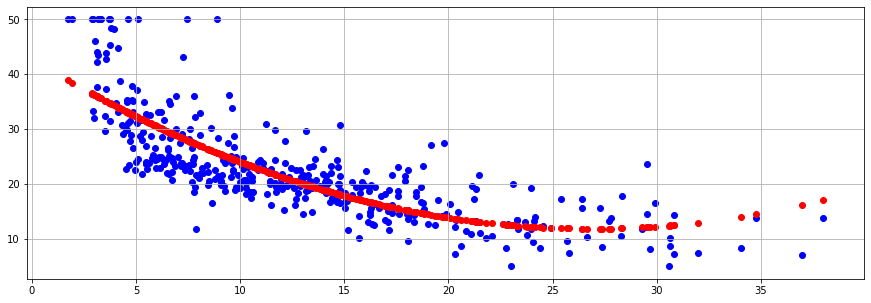

In [32]:
plt.figure(figsize = (15,5))
# beacuse it have only  Train data - Regression line (eq can also be used)
plt.scatter(X_train["lstat"], y_train,  color='blue')
plt.scatter(X_train["lstat"], poly_model.predict(X_train_poly),  color='red')
plt.grid()
plt.show()

<font size="4" color="orange"><b>Ahhh !!! We convert straight best fit line with curvy best line and this seems reasonable too. Further lets add RM and its polynominal features</b></font>

<font size="6" color="maroon"><b><center><u>Model 6: OLS with LSTAT, RM & LSTAT,RM polynominal features</u></center></b></font>

<font color="green" size="4"><b>Check For Outlier in LSTAT and RM</b></font>

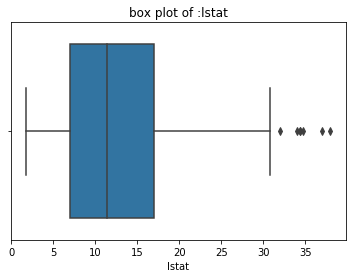

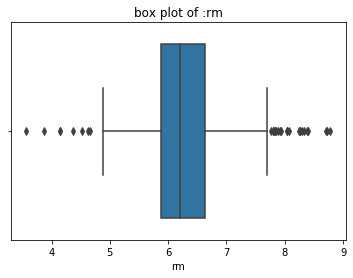

In [33]:
for i in ['lstat','rm']:
    sns.boxplot(data[i])
    plt.title('box plot of :'+i)
    plt.show()

<font size="4" color="orange"><b>In Lstat we can do log transformation and reduce the outlier</b></font>

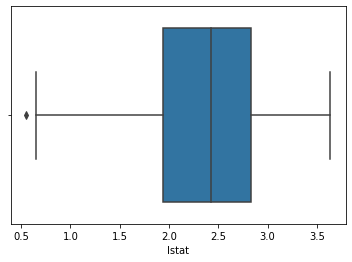

In [34]:
sns.boxplot(np.log(data.lstat))

<font size="4" color="green"><b>Thus in Model building we will take log of lstat</b></font>

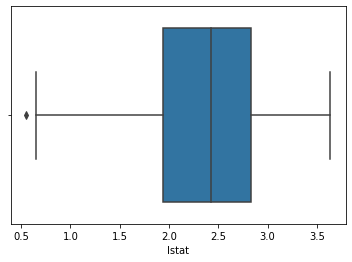

In [35]:
sns.boxplot(np.log(data.lstat))

In [36]:
data['lstat_log'] = np.log(data['lstat'])

<font color="green" size="4"><b>In rm we will only replace some specific value by mode Since there are large no of outlier</b></font>

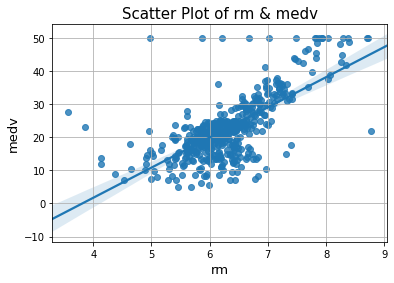

In [37]:
scatter_regplot(x = "rm", y = "medv", in_data = data)

<font color="orange" size="4"><b>Find Some outlier which are away from regression Line</b></font>

In [38]:
data[(data.rm>8) & (data.medv<30)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,lstat_log
364,3.47428,0.0,18.1,1,0.718,8.78,82.9,1.9047,24,666,20.2,354.55,5.29,21.9,1.665818


In [39]:
data[(data.rm<4) & (data.medv>20)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,lstat_log
365,4.55587,0.0,18.1,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5,1.962908
367,13.52220,0.0,18.1,0,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33,23.1,2.590017


<font color="orange" size="4"><b>Thus replacing above three outlier with mode</b></font>

In [40]:
data["rm"] = np.where((data.rm>8) & (data.medv<30), data["rm"].median(), data["rm"])

In [41]:
data["rm"] = np.where((data.rm<4) & (data.medv>20), data["rm"].median(), data["rm"])

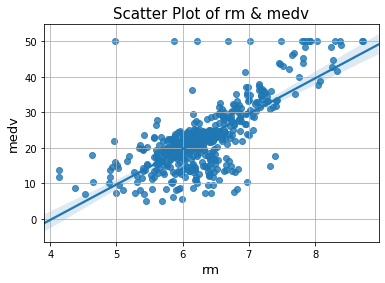

In [42]:
scatter_regplot(x = "rm", y = "medv", in_data = data)

In [43]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,lstat_log
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.605430
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,2.212660
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1.393766
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1.078410
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1.673351


In [44]:
X = data[["rm","lstat_log"]]   # Input data  (Hiring is not useful for predicting)
y = data[["medv"]]             # Output data


# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 21)   # 70-30 Split

# transforms the existing features to higher degree features.
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)

# fit the transformed features to Linear Regression
poly_model = sm.OLS(y_train, X_train_poly)       # Creates function
poly_model = poly_model.fit()                      # Get best fit line output

poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     290.2
Date:                Fri, 02 Oct 2020   Prob (F-statistic):          2.69e-130
Time:                        22:58:32   Log-Likelihood:                -1153.1
No. Observations:                 404   AIC:                             2318.
Df Residuals:                     398   BIC:                             2342.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        126.6114     33.344      3.797      0.000      61.060     192.163
x1           -29.7296      7.727     -3.848      0.000     -44.920     -14.540
x2            -8.5311      8.866     -0.962      0.337     -25.962       8.899
x3             2.6198      0.458      5.724      0.000       1.720       3.519
x4            -0.0669      0.955     -0.070      0.944      -1.944       1.810
x5            -0.0993      0.763     -0.130      0.896      -1.598       1.400
==============================================================================
Omnibus:                      123.664   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.207
Skew:                           1.230   Prob(JB):                    1.04e-131
Kurtosis:                       8.457   Cond. No.                     7.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font size="4" color="orange"><b>Thus we can see that by manupulating outlier the R-square Value has increased</b></font>

In [45]:
X_test_poly = polynomial_features.fit_transform(X_test)    #Checking on test data

# Calculate R square vale
rsq = r2_score(y_test["medv"],poly_model.predict(X_test_poly))    # On test data (In summary output its on train data)
print ("R Square:", round(rsq, 3))

R Square: 0.755


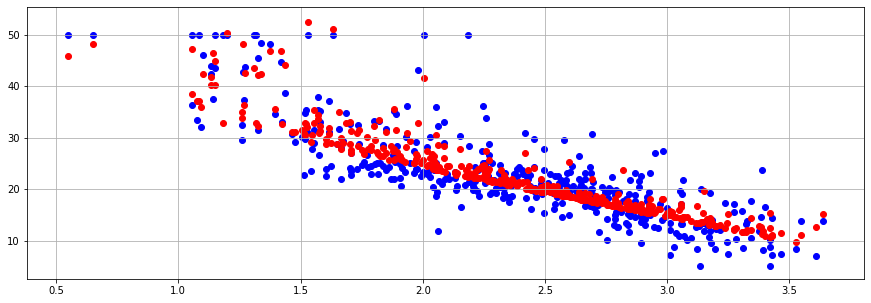

In [46]:
plt.figure(figsize = (15,5))
# beacuse it have only  Train data - Regression line (eq can also be used)
plt.scatter(X_train["lstat_log"], y_train,  color='blue')
plt.scatter(X_train["lstat_log"], poly_model.predict(X_train_poly),  color='red')
plt.grid()
plt.show()

<font size="4" color="orange"><b>Model 6 !!! Looks good to go.. Train R2 = 78% & Test R2 = 75%</b></font>

<font size="6" color="Red"><b><center><u>Error Analysis on Model 6</u></center></b></font>

In [47]:
# Best Model name poly_model --- Replace with which ever model you want to use for Error Analysis

errors_train = y_train["medv"] - poly_model.predict(X_train_poly)    # Actuals - Predicted = Errors
errors_test = y_test["medv"] - poly_model.predict(X_test_poly)

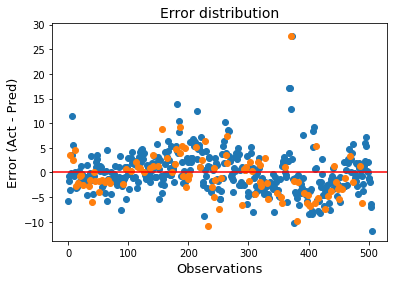

In [48]:
plt.scatter(y_train.index, errors_train)   # y_train.index & X_train.index is same
plt.scatter(y_test.index, errors_test)
plt.xlabel("Observations", fontsize = 13)
plt.ylabel("Error (Act - Pred)",  fontsize = 13)
plt.title("Error distribution",  fontsize = 14)
plt.axhline(0, color = "red")
plt.show()

<font size="3">Error Should be close to 0</font>

In [49]:
X_test_poly = polynomial_features.fit_transform(X_test)    #Checking on test data

# Calculate R square vale
rsq = r2_score(y_test["medv"],poly_model.predict(X_test_poly))    # On test data (In summary output its on train data)
print ("R Square:", round(rsq, 3))

R Square: 0.755


<font size="4" color="green"><b>Conclusing Statement</b></font>

   Using Polynominal regression we achieved 78% on train dataset & 75% on test data..